In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
infile_train = "./kaggle/digit_recognizer/train.csv"
infile_test = "./kaggle/digit_recognizer/test.csv"

In [3]:
test_data = pd.read_csv(infile_test)
train_data = pd.read_csv(infile_train)

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(train_data)
data.shape

(42000, 785)

In [6]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [7]:
m,n = data.shape

In [8]:
np.random.shuffle(data)

In [9]:
data

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [10]:
test = data[0:1000].T
ytest = test[0]
Xtest = test[1:n]
Xtest = Xtest / 255

train = data[1000:m].T
ytrain = train[0]
Xtrain = train[1:n]
Xtrain = Xtrain / 255

In [11]:
Xtrain.shape

(784, 41000)

In [12]:
ytrain.shape

(41000,)

In [23]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return w1,b1,w2,b2

In [24]:
def ReLu(z):
    return np.maximum(z,0)

In [25]:
def ReLU_deriv(Z):
    return Z > 0


In [46]:
def softmax(z):
    return np.exp(z) / sum(np.exp(z))

In [47]:
def forward_prop(w1, b1,w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1,A1,Z2,A2

In [48]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] =1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [49]:
def back_prop(Z1,A1,Z2,A2,W1,W2,x,y):
    one_hot_Y = one_hot(y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(x.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

    

In [50]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [51]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [52]:
W1, b1, W2, b2 = gradient_descent(Xtrain, ytrain, 0.10, 500)

Iteration:  0
[4 4 7 ... 7 1 4] [8 1 2 ... 1 2 7]
0.07775609756097561
Iteration:  10
[9 6 2 ... 7 3 0] [8 1 2 ... 1 2 7]
0.18121951219512195
Iteration:  20
[1 1 2 ... 7 3 7] [8 1 2 ... 1 2 7]
0.26358536585365855
Iteration:  30
[1 1 2 ... 7 1 7] [8 1 2 ... 1 2 7]
0.3331707317073171
Iteration:  40
[1 1 2 ... 7 1 7] [8 1 2 ... 1 2 7]
0.3815609756097561
Iteration:  50
[1 1 2 ... 7 1 7] [8 1 2 ... 1 2 7]
0.417
Iteration:  60
[1 1 2 ... 1 6 7] [8 1 2 ... 1 2 7]
0.4478048780487805
Iteration:  70
[1 1 3 ... 1 1 7] [8 1 2 ... 1 2 7]
0.48765853658536584
Iteration:  80
[1 1 3 ... 1 1 7] [8 1 2 ... 1 2 7]
0.5419512195121952
Iteration:  90
[1 1 3 ... 1 2 7] [8 1 2 ... 1 2 7]
0.5892439024390244
Iteration:  100
[1 1 3 ... 1 2 7] [8 1 2 ... 1 2 7]
0.626390243902439
Iteration:  110
[1 1 3 ... 8 2 7] [8 1 2 ... 1 2 7]
0.6542439024390244
Iteration:  120
[1 1 3 ... 8 2 7] [8 1 2 ... 1 2 7]
0.6760243902439025
Iteration:  130
[1 1 3 ... 8 2 7] [8 1 2 ... 1 2 7]
0.6930487804878048
Iteration:  140
[1 1 3 ... 

In [53]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = Xtrain[:, index, None]
    prediction = make_predictions(Xtrain[:, index, None], W1, b1, W2, b2)
    label = ytrain[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [8]
Label:  8


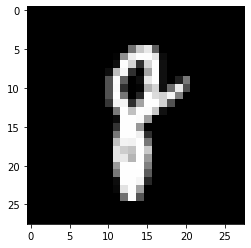

Prediction:  [1]
Label:  1


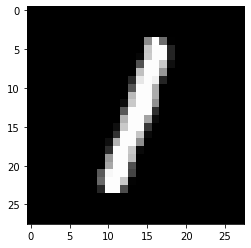

Prediction:  [3]
Label:  2


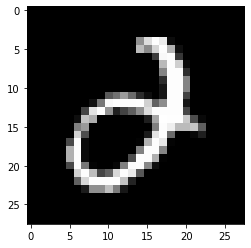

Prediction:  [9]
Label:  9


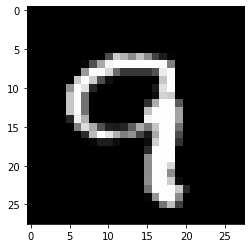

In [54]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [55]:
dev_predictions = make_predictions(Xtest, W1, b1, W2, b2)
get_accuracy(dev_predictions, ytest)

[2 1 9 4 1 3 9 2 6 0 3 3 0 4 8 9 5 3 2 1 2 2 0 0 6 2 1 2 0 6 6 7 6 2 6 8 7
 7 1 2 4 7 4 3 6 4 8 9 9 2 0 7 6 8 2 5 5 0 4 1 7 7 6 6 0 4 3 9 9 6 0 4 9 9
 1 3 3 6 4 2 0 9 1 1 6 4 6 7 4 8 6 4 2 0 1 0 4 1 6 2 0 5 2 1 9 1 3 1 1 8 1
 1 1 8 2 2 6 0 5 8 9 7 8 9 3 8 5 4 0 7 4 8 3 1 1 4 7 0 9 4 3 7 7 3 2 7 3 8
 1 9 9 7 9 1 1 8 8 8 6 5 2 1 0 0 1 4 9 3 6 1 4 5 5 2 1 1 2 2 1 5 2 3 7 0 1
 2 1 9 6 0 1 3 9 1 3 3 0 9 7 9 6 1 3 1 3 0 5 7 5 7 5 8 3 2 8 4 4 5 0 3 8 7
 1 7 3 2 3 2 8 0 6 2 7 6 0 4 7 3 5 8 2 7 5 9 4 4 2 8 5 9 0 7 9 4 6 2 4 6 8
 9 8 7 6 8 0 4 2 7 8 1 9 8 0 8 6 7 1 6 1 9 1 1 3 0 1 2 9 3 2 6 3 8 0 2 7 4
 6 4 1 4 9 6 1 6 1 4 9 7 2 1 6 9 1 8 2 1 1 4 7 7 4 5 7 0 5 4 6 8 9 7 2 3 3
 2 4 2 0 9 4 3 8 1 3 9 9 8 0 0 9 4 0 6 3 9 9 8 2 6 8 8 9 1 1 8 0 5 4 1 9 2
 1 7 1 2 5 1 1 7 9 9 4 3 4 6 1 2 9 7 5 6 1 1 7 8 1 6 8 8 3 6 7 5 2 4 1 9 6
 0 8 2 4 5 6 4 1 1 0 2 3 7 7 0 4 6 5 6 7 5 1 9 9 4 7 1 9 8 5 3 1 9 9 6 9 7
 1 6 5 7 0 3 7 9 1 4 2 1 7 0 2 2 7 7 0 1 2 8 9 2 0 0 4 4 9 8 8 7 1 1 2 8 3
 0 7 9 9 0 0 4 5 5 9 9 7 

0.865